# **Avaliação parcial 3**

## Métodos implementados

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
def lagrange_interpolation(x, xi, yi):
  n = len(xi)
  sum = 0

  for k in range(n):
    prod = 1
    for j in range(n):
      if j != k:
        prod *= (x - xi[j]) / (xi[k] - xi[j])
    sum += yi[k] * prod

  return sum

In [30]:
def trapezium(fx, x):
  return (x[1] - x[0])/2 * (fx[0] + fx[1])

In [31]:
def simpson_13(fx, x):
  h = (x[-1] - x[0]) / 2
  return (h/3) * (fx[0] + 4 * fx[1] + fx[2])

In [32]:
def simpson_38(fx, x):
  h = (x[-1] - x[0]) / 3
  return (3 * h / 8) * (fx[0] + 3*fx[1] + 3*fx[2] + fx[3])

In [33]:
def find_intervals(arr):
  result = []
  current_diff = arr[1] - arr[0]
  current_indices = [0, 1]

  for i in range(2, len(arr)):
    diff = arr[i] - arr[i-1]
    if diff == current_diff:
      current_indices.append(i)
    else:
      result.append(current_indices)
      current_indices = [i-1, i]
      current_diff = diff

  result.append(current_indices)
  return result

In [34]:
def double_integral(x, y, fxy, integrate):
  dy_integral = []
  for i,fxy_value in enumerate(fxy):
    dy_integral.append(integrate(fxy_value, y))
  dy_integral = np.array(dy_integral)

  return integrate(dy_integral, x)

In [35]:
def divided_differences(x, fx):
  n = len(fx)
  table = np.zeros((n, n))
  table[:, 0] = fx

  for j in range(1, n):
    for i in range(n - j):
      table[i, j] = (table[i+1, j-1] - table[i, j-1]) / (x[i+j] - x[i])

  return table

In [36]:
def newton_interpolation(x0, xi, divided_differences):
  n = len(xi)
  result = 0

  for i in range(n):
    term = divided_differences[i]
    for j in range(i):
      term *= (x0 - xi[j])
    result += term

  return result

## **(TEÓRICA) Questão 1**

A distância percorrida em metros para que um carro pare foi obtida
através de experimentos e está apresentada na tabela abaixo:

$$
\begin{array}{|c|c|}
\hline
\text{Vel (Km/h)} & 15 & 20 & 25 & 30 & 40 & 50\\
\hline
\text{Distância (m)} & 16 & 20 & 34 & 40 & 60 & 90\\
\hline
\end{array}
$$

Ou seja, se o carro está correndo a 25 Km/h e o freio for acionado, ele parará após percorrer
34 m. Qual a distância percorrida até parar se o carro estiver a 45 Km/h ? Estime, utilizando
um polinômio interpolador de Newton de 4° grau! Qual o erro estimado ? (2,0 pontos)

In [57]:
velocidade = np.array([15, 20, 25, 30, 40, 50])/3.6
distancia = np.array([16, 20, 34, 40, 60, 90])
vi = 45/3.6

print(f'velocidade em m/s: {velocidade}')
print(f'vi = {vi}')

velocidade em m/s: [ 4.16666667  5.55555556  6.94444444  8.33333333 11.11111111 13.88888889]
vi = 12.5


In [56]:
dif_div = divided_differences(velocidade, distancia)
columns = ['f(x)', '1st order', '2nd order', '3rd order', '4th order', '5th order']
print('Diferenças Divididas:')
pd.DataFrame(dif_div, index=velocidade, columns=columns)

Diferenças Divididas:


,f(x),1st order,2nd order,3rd order,4th order,5th order
4.166667,16.0,2.88,2.5920,-1.119744,0.232907,-0.030176
5.555556,20.0,10.08,-2.0736,0.497664,-0.060466,0.000000
6.944444,34.0,4.32,0.6912,-0.006221,0.000000,0.000000
8.333333,40.0,7.20,0.6480,0.000000,0.000000,0.000000
11.111111,60.0,10.80,0.0000,0.000000,0.000000,0.000000
13.888889,90.0,0.00,0.0000,0.000000,0.000000,0.000000


In [48]:
res_4 = newton_interpolation(vi, velocidade[1:], dif_div[1,:-1])
res_5 = newton_interpolation(vi, velocidade, dif_div[0])

print(f'Resultado do polinomio interpolador de 4° grau: {res_4:.2f}')
print(f'Resultado do polinomio interpolador de 5° grau: {res_5:.2f}')
print(f'Erro: {res_5 - res_4:.2f}')

Resultado do polinomio interpolador de 4° grau: 76.50
Resultado do polinomio interpolador de 5° grau: 85.86
Erro: 9.36


## **(TEÓRICA) Questão 2**

Sendo $f(x,y) = \frac{1}{(x+y)²}$, estime $I = \int_3^4 \int_1^2 f(x,y)\ dy dx$ com aplicações únicas da regra 1/3 de Simpson (2,0 pontos).

In [58]:
f = lambda x,y: 1 / (x+y)**2
y = np.linspace(1, 2, 3)
x = np.linspace(3, 4, 3)
fxy = f(*np.meshgrid(x,y))
res_13 = double_integral(x, y, fxy, simpson_13)
print(f"Resultado da integral: {res_13:.4f}")

Resultado da integral: 0.0408


## **(PRÁTICA) Questão 3**

A viscosidade dinâmica da água $\mu (10^{-3}N.\frac{s}{m²})$ está relacionada com a temperatura $T (°C)$ da seguinte maneira:

$$
\begin{array}{|c|c|}
\hline
T & 0 & 5 & 10 & 20 & 30 & 40\\
\hline
\mu & 1,787 & 1,519 & 1,307 & 1,002 & 0,7975 & 0,6529\\
\hline
\end{array}
$$

### (a) Interpole todos os pontos utilizando a técnica de Lagrange para prever $\mu$ em $T = 7.5°$ (2,0 pontos)

In [60]:
x = np.array([0, 5, 10, 20, 30, 40]) # Temperatura
y = np.array([1.787, 1.519, 1.307, 1.002, 0.7975, 0.6529]) # viscosidade
xi = 7.5

yi = lagrange_interpolation(xi, x, y)
print(f'f({xi}) = {yi:.4f}')

f(7.5) = 1.4069


### (b) Trace o gráfico do polinômio interpolador juntamente com os pontos dados (1,0 ponto)

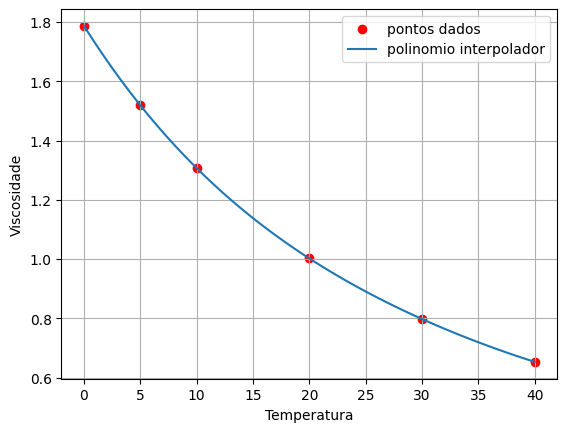

In [61]:
x_interp = np.linspace(0, 40)
y_interp = lagrange_interpolation(x_interp, x, y)
plt.scatter(x, y, c='r', label='pontos dados')
plt.plot(x_interp, y_interp, label='polinomio interpolador')
plt.xlabel('Temperatura')
plt.ylabel('Viscosidade')
plt.legend()
plt.grid()
plt.show()

## **(PRÁTICA) Questão 4**

Um carro de corrida demora 79 segundos a percorrer uma pista. A velocidade do
carro (em m/s) é determinada através de um radar e é apresentada desde o início da volta na seguinte tabela:

$$
\begin{array}{|c|c|}
\hline
\text{Tempo} & 0 & 0,5 & 1 & 1,5 & 48 & 48,5 & 49 & 59 & 69 & 79\\
\hline
\text{Velocidade} & 62 & 74 & 73,5 & 60,5 & 49,5 & 42,5 & 39 & 44,5 & 58 & 61,5\\
\hline
\end{array}
$$

Estime o comprimento da pista utilizando integração numérica com combinações das regras 1/3 de simpson, 3/8 de Simpson e trapézio (3,0 pontos).

In [44]:
x = np.array([0, 0.5, 1, 1.5, 48, 48.5, 49, 59, 69, 79]) # Tempo
fx = np.array([62, 74, 73.5, 60.5, 49.5, 42.5, 39, 44.5, 58, 61.5])/3.6 # Velocidade

In [45]:
intervals = find_intervals(x)
result = 0
for interval in intervals:
  if len(interval) == 2:
    result += trapezium(fx[interval],x[interval])
  if len(interval) == 3:
    result += simpson_13(fx[interval], x[interval])
  elif len(interval) == 4:
    result += simpson_38(fx[interval], x[interval])

print(f'Intervalos: {intervals}')
print(f'Resultado da integral: {result:.3f}')

Intervalos: [[0, 1, 2, 3], [3, 4], [4, 5, 6], [6, 7, 8, 9]]
Resultado da integral: 1176.811
